In [20]:
!nvidia-smi

Wed Jul  1 11:16:12 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:01:00.0  On |                  N/A |
|  0%   49C    P2    26W / 120W |   2808MiB /  3016MiB |      2%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
import torch

print(torch.cuda.is_available())

True


In [2]:
import time # times in seconds
def time_torch(size):
    x = torch.rand(size, size, device=torch.device("cuda"))
    start = time.time()
    x.sin_()
    end = time.time()
    return(end - start)

def time_cpu(size):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x.sin_()
    end = time.time()
    return(end - start)

In [3]:
def get_cuda_cpu_times(sizes):
    cpuTimes = []
    cudaTimes = []

    for s in sizes:
        cpuTimes += [time_cpu(s)]
        cudaTimes += [time_torch(s)]
    return cpuTimes, cudaTimes

print(get_cuda_cpu_times(range(2, 10, 2)))

([0.00028634071350097656, 1.049041748046875e-05, 4.291534423828125e-06, 4.0531158447265625e-06], [3.9577484130859375e-05, 1.0728836059570312e-05, 1.0013580322265625e-05, 1.0013580322265625e-05])


In [122]:
import matplotlib.pyplot as plt


def plot_cuda_vs_cpu(cpuTimes, cudaTimes, sizes, xLab="Matrix Width"):
    plt.title("CUDA vs CPU")
    cpu_plot = plt.plot(sizes, cpuTimes, label="CPU")
    cuda_plot = plt.plot(sizes, cudaTimes, label="CUDA")
    plt.legend(bbox_to_anchor=(0.8, 0.98), loc='upper left', borderaxespad=0.)
    # plt.legend(handles=[cpu_plot, cuda_plot])
    plt.xlabel(xLab)
    plt.ylabel('Execution Time (Seconds)')
    plt.show()

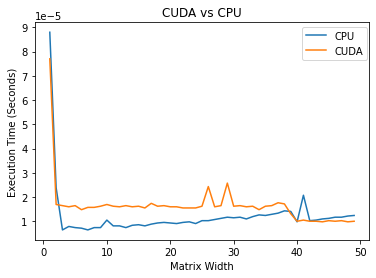

In [62]:
sizes = range(1, 50, 1)
cpu_t, cuda_t = get_cuda_cpu_times(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

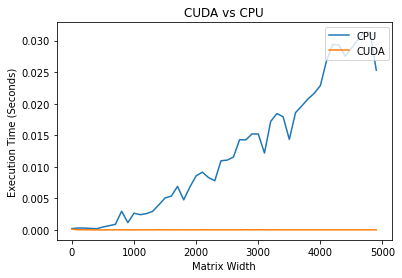

In [64]:
sizes = range(1, 5000, 100)
cpu_t, cuda_t = get_cuda_cpu_times(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

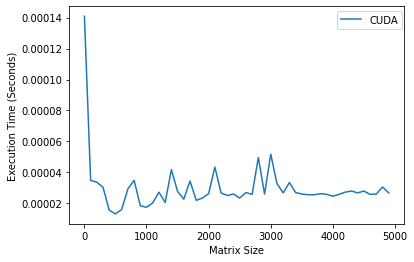

In [73]:
# cpu_plot = plt.plot(sizes, cpuTimes, label="CPU")
cuda_plot = plt.plot(sizes, cuda_t, label="CUDA")
plt.legend(bbox_to_anchor=(0.8, 0.98), loc='upper left', borderaxespad=0.)
# plt.legend(handles=[cpu_plot, cuda_plot])
plt.xlabel('Matrix Size')
plt.ylabel('Execution Time (Seconds)')
plt.show()

In [85]:
import time # times in seconds
def time_torch_copy(size):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x = x.cuda()
    x.sin_()
    end = time.time()
    return(end - start)
time_torch_copy(2)

0.00036406517028808594

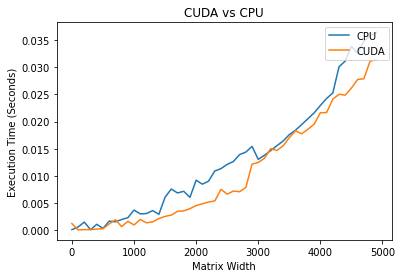

In [86]:
def get_cuda_cpu_times_with_copy(sizes):
    cpuTimes = []
    cudaTimes = []
    for s in sizes:
        cpuTimes += [time_cpu(s)]
        cudaTimes += [time_torch_copy(s)]
    return cpuTimes, cudaTimes

sizes = range(1, 5000, 100)
cpu_t, cuda_t = get_cuda_cpu_times_with_copy(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

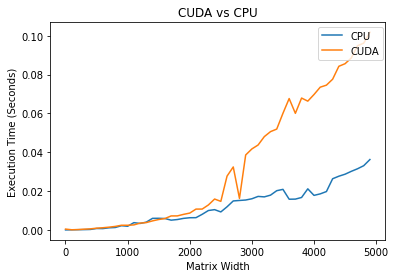

In [88]:
import time # times in seconds
def time_torch_copy_and_back(size):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x = x.cuda()
    x.sin_()
    x = x.cpu()
    end = time.time()
    return(end - start)
time_torch_copy(2)

def get_cuda_cpu_times_with_copy(sizes):
    cpuTimes = []
    cudaTimes = []
    for s in sizes:
        cpuTimes += [time_cpu(s)]
        cudaTimes += [time_torch_copy_and_back(s)]
    return cpuTimes, cudaTimes

sizes = range(1, 5000, 100)
cpu_t, cuda_t = get_cuda_cpu_times_with_copy(sizes)
plot_cuda_vs_cpu(cpu_t, cuda_t, sizes)

In [95]:
def time_torch_operation_repetition(size, iterations):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    x = x.cuda()
    for _ in range(0, iterations):  
        x.sin()
    end = time.time()
    return(end - start)

In [101]:
def time_cpu_operation_repetition(size, iterations):
    x = torch.rand(size, size, device=torch.device("cpu"))
    start = time.time()
    for _ in range(0, iterations):  
        x.sin()
    end = time.time()
    return(end - start)

In [126]:
def get_cuda_cpu_times_with_iterations(iterations):
    cpuTimes = []
    cudaTimes = []
    for i in iterations:
        cpuTimes += [time_cpu_operation_repetition(300, i)]
        cudaTimes += [time_torch_operation_repetition(300, i)]
    return cpuTimes, cudaTimes

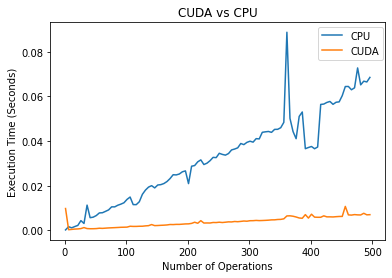

In [125]:
iterations = range(1, 500, 5)
cpu_t, cuda_t = get_cuda_cpu_times_with_iterations(iterations)
plot_cuda_vs_cpu(cpu_t, cuda_t, iterations, xLab="Number of Operations")